# MNIST dataset

## Taking a look at dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

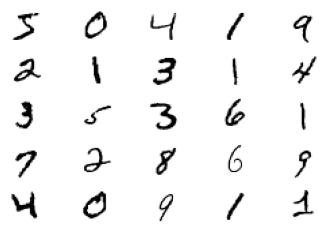

In [3]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [4]:
(xtrain.shape, ytrain.shape), (xtest.shape, ytest.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [5]:
type(xtrain)

numpy.ndarray

In [6]:
X = np.concatenate((xtrain, xtest))
y = np.concatenate((ytrain, ytest))
X.shape, y.shape

((70000, 28, 28), (70000,))

In [7]:
X[0].shape

(28, 28)

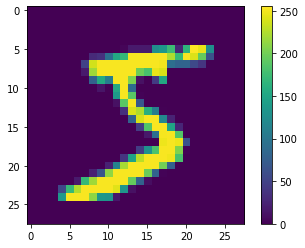

In [8]:
# checking the first image in xtrain
plt.figure()
plt.imshow(xtrain[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Scale these values to a range of 0 to 1
xtrain = xtrain / 255.0

xtest = xtest / 255.0

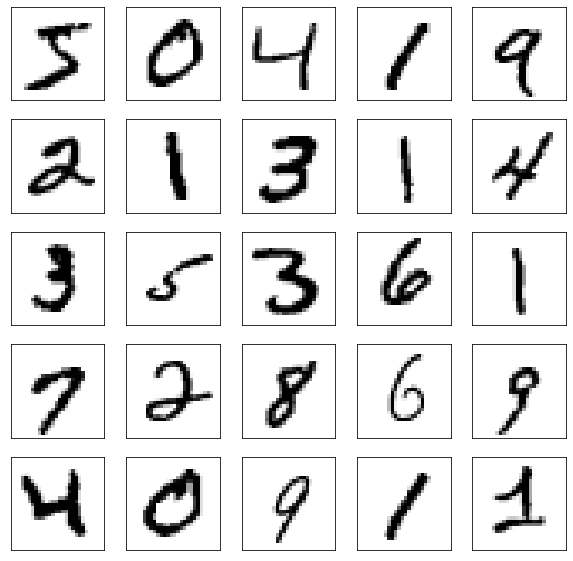

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
plt.show()

## Building Neural Networks for MNIST

In [11]:
from tensorflow.keras import backend as K

K.clear_session()

**Selection of loss function and its hyperparameter in compile step:**

**CategoricalCrossentropy**: provide labels using one-hot representation.(In general, we use crossentropy loss function when there are two or more label classes)
* **from_logits**: Whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution.
    - 'Logits' in ML: the vector of **raw (non-normalized) predictions** that a classification model generates, which is ordinarily then passed to a **normalization function**. If the model is solving a multi-class classification problem, logits typically become an input to the **softmax function**. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


# build the computation graph
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# train the model
h  = model.fit(xtrain, ytrain, epochs=10, validation_split = 0.3)


Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3025 - accuracy: 0.9127 - val_loss: 0.1848 - val_accuracy: 0.9484
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1362 - accuracy: 0.9603 - val_loss: 0.1370 - val_accuracy: 0.9604
Epoch 3/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0926 - accuracy: 0.9732 - val_loss: 0.1119 - val_accuracy: 0.9668
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.1120 - val_accuracy: 0.9672
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0526 - accuracy: 0.9847 - val_loss: 0.1035 - val_accuracy: 0.9698
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 0.0984 - val_accuracy: 0.9708
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.1026 - val_accuracy:

In [14]:
import pandas as pd
df_metrics = pd.DataFrame(h.history)
df_metrics 

,loss,accuracy,val_loss,val_accuracy
0,0.302487,0.912738,0.184846,0.948389
1,0.136241,0.960333,0.136976,0.960389
2,0.092643,0.973190,0.111934,0.966778
3,0.068219,0.979143,0.112011,0.967222
4,0.052604,0.984690,0.103494,0.969778
5,0.040873,0.988071,0.098374,0.970833
6,0.031716,0.990833,0.102622,0.972000
7,0.025788,0.992714,0.108986,0.969667
8,0.021151,0.994000,0.100381,0.973722
9,0.016173,0.995619,0.111113,0.971611


<AxesSubplot:>

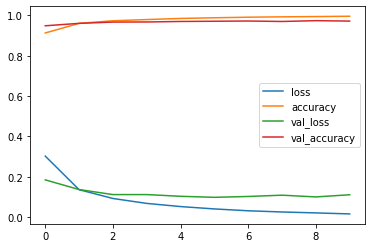

In [15]:
df_metrics.plot()

In [16]:
# Evaluation

test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0932 - accuracy: 0.9747

Test accuracy: 0.9746999740600586


## Make predictions

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(xtest)

In [18]:
predictions[0]  # The highest confidence value is for digit 7 (9.99881387e-01)

array([5.0500399e-09, 9.0360164e-11, 2.3412925e-07, 2.6652240e-04,
       1.3156856e-14, 1.2153538e-10, 7.2377277e-16, 9.9972409e-01,
       1.8660316e-08, 9.1144511e-06], dtype=float32)

In [19]:
np.argmax(predictions[0])  #we get the position of the maximum value

7

In [20]:
ytest[0]  # So the prediction was correct

7

In [21]:
#Graph this to look at the full set of 10 class predictions

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'



def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

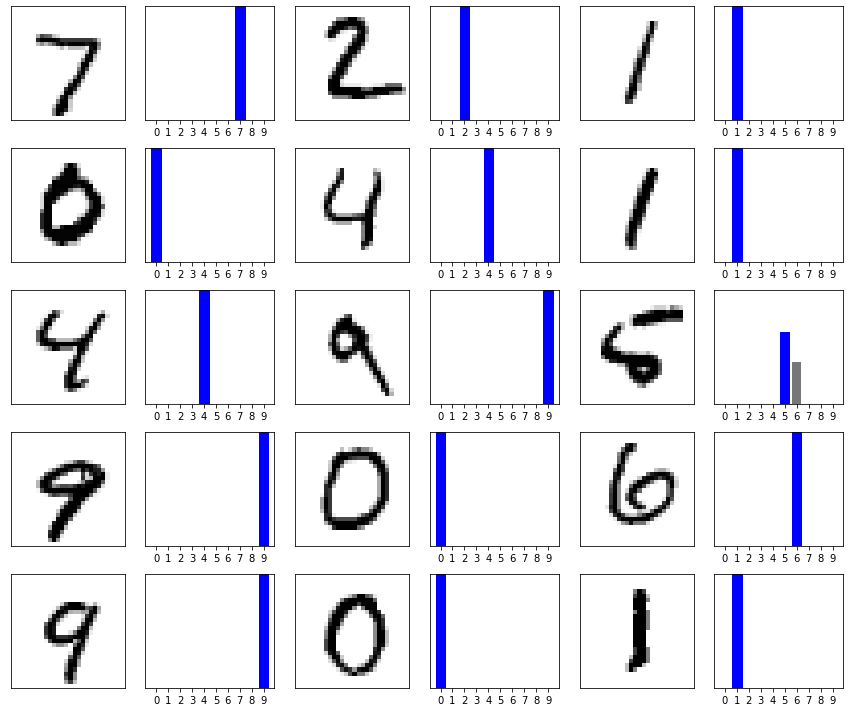

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], ytest)
plt.tight_layout()
plt.show()

### use the trained model to make a prediction about a single image

In [23]:
# Grab an image from the test dataset.
img = xtest[1]

print(img.shape)

(28, 28)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
#Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.3680936e-09 1.3206359e-07 9.9999964e-01 2.8434582e-07 4.0084394e-20
  4.0785714e-10 1.8631851e-11 7.1432916e-17 4.2233186e-09 5.5166478e-16]]


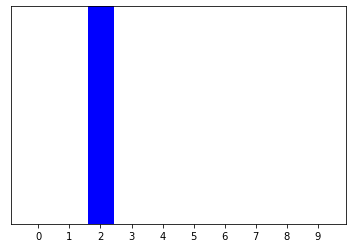

In [26]:
plot_value_array(1, predictions_single[0], ytest)
_ = plt.xticks(range(10))
plt.show()

In [ ]:
np.argmax(predictions_single[0])

## Regularize a MNIST model which had overfitting

### Step 1:

* Build a Dense ANN with five hidden layers of 25 neurons each

* Add a softmax output layer with ten neurons



In [27]:
from tensorflow.keras import backend as K
K.clear_session()

model_r = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Step 2:

* Train the model with optimizer='adam'

* Use a batch size of at least 500

* Run 100 epochs.

What accuracy do you reach?

Is the network overfitting?


In [28]:
# build the computation graph
model_r.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model_r.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2

In [29]:
history = model_r.fit(xtrain, ytrain, epochs=100, batch_size=600, validation_split = 0.3)

Epoch 1/100


/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


70/70 [==============================] - 1s 10ms/step - loss: 1.5980 - accuracy: 0.4625 - val_loss: 0.6356 - val_accuracy: 0.8226
Epoch 2/100
70/70 [==============================] - 1s 7ms/step - loss: 0.4365 - accuracy: 0.8769 - val_loss: 0.3336 - val_accuracy: 0.9019
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 0.2988 - accuracy: 0.9140 - val_loss: 0.2665 - val_accuracy: 0.9213
Epoch 4/100
70/70 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9274 - val_loss: 0.2282 - val_accuracy: 0.9344
Epoch 5/100
70/70 [==============================] - 0s 7ms/step - loss: 0.2168 - accuracy: 0.9377 - val_loss: 0.2193 - val_accuracy: 0.9352
Epoch 6/100
70/70 [==============================] - 0s 7ms/step - loss: 0.1951 - accuracy: 0.9431 - val_loss: 0.2007 - val_accuracy: 0.9422
Epoch 7/100
70/70 [==============================] - 0s 7ms/step - loss: 0.1772 - accuracy: 0.9479 - val_loss: 0.1993 - val_accuracy: 0.9419
Epoch 8/100
70/70 [=====

Epoch 59/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.2241 - val_accuracy: 0.9561
Epoch 60/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.2268 - val_accuracy: 0.9549
Epoch 61/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.2266 - val_accuracy: 0.9553
Epoch 62/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.2378 - val_accuracy: 0.9539
Epoch 63/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.2403 - val_accuracy: 0.9551
Epoch 64/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 0.9947 - val_loss: 0.2379 - val_accuracy: 0.9554
Epoch 65/100
70/70 [==============================] - 0s 7ms/step - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.2445 - val_accuracy: 0.9547
Epoch 

In [30]:
df_metrics = pd.DataFrame(history.history)
df_metrics 

,loss,accuracy,val_loss,val_accuracy
0,1.598022,0.462452,0.635611,0.822611
1,0.436482,0.876929,0.333561,0.901944
2,0.298848,0.914024,0.266504,0.921278
3,0.249558,0.927357,0.228180,0.934389
4,0.216809,0.937667,0.219275,0.935222
...,...,...,...,...
95,0.014705,0.995024,0.332912,0.955056
96,0.009393,0.997357,0.331793,0.954500
97,0.005274,0.998762,0.322574,0.955222
98,0.003899,0.999357,0.332645,0.955778


<AxesSubplot:>

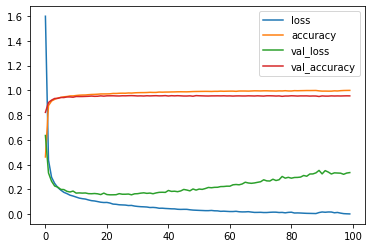

In [31]:
df_metrics.plot()   #we have an increase in val-loss so we have over fitting

In [32]:
# Evaluation

test_loss_r, test_acc_r = model_r.evaluate(xtest,  ytest, verbose=2)

print('\nTest accuracy:', test_acc)

/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 1s - loss: 0.2800 - accuracy: 0.9598

Test accuracy: 0.9746999740600586


### Step 3: Add Early Stopping. After how many epochs does it stop?


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=3)
new_h = model_r.fit(xtrain, ytrain, epochs=100, batch_size=600, callbacks=[callback], validation_split=0.2)

Epoch 1/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0771 - accuracy: 0.9830 - val_loss: 0.2917 - val_accuracy: 0.9571
Epoch 2/100
80/80 [==============================] - 1s 6ms/step - loss: 0.0484 - accuracy: 0.9877 - val_loss: 0.2624 - val_accuracy: 0.9576
Epoch 3/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0385 - accuracy: 0.9896 - val_loss: 0.2708 - val_accuracy: 0.9575
Epoch 4/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9911 - val_loss: 0.2519 - val_accuracy: 0.9598
Epoch 5/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.2502 - val_accuracy: 0.9577
Epoch 6/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.2481 - val_accuracy: 0.9590
Epoch 7/100
80/80 [==============================] - 0s 6ms/step - loss: 0.0199 - accuracy: 0.9948 - val_loss: 0.2695 - val_accuracy: 0.9572
Epoch 8/100
8

In [34]:
new_df_metrics = pd.DataFrame(new_h.history)
new_df_metrics 

,loss,accuracy,val_loss,val_accuracy
0,0.077106,0.983000,0.291712,0.957083
1,0.048439,0.987667,0.262415,0.957583
2,0.038458,0.989583,0.270796,0.957500
3,0.032535,0.991146,0.251905,0.959833
4,0.029162,0.991771,0.250224,0.957667
5,0.022826,0.994021,0.248127,0.959000
6,0.019922,0.994792,0.269527,0.957167
7,0.021166,0.994333,0.270972,0.956750
8,0.020409,0.994250,0.259222,0.959417


<AxesSubplot:>

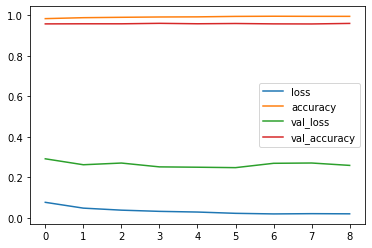

In [35]:
new_df_metrics.plot()

### Step 4: Add Batch Normalization to every layer.

* Compare the learning curves: is it converging faster than before?

Is it still overfitting?


In [36]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
K.clear_session()

model_r_with_nbatch = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
model_r_with_nbatch.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history_with_nbatch = model_r_with_nbatch.fit(xtrain, ytrain, epochs=100, callbacks=[callback], batch_size=600, validation_split = 0.3)

Epoch 1/100


/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


70/70 [==============================] - 2s 12ms/step - loss: 1.3248 - accuracy: 0.5866 - val_loss: 1.7187 - val_accuracy: 0.6278
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 0.5102 - accuracy: 0.8657 - val_loss: 0.8417 - val_accuracy: 0.8445
Epoch 3/100
70/70 [==============================] - 1s 10ms/step - loss: 0.3159 - accuracy: 0.9149 - val_loss: 0.4254 - val_accuracy: 0.8983
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 0.2491 - accuracy: 0.9310 - val_loss: 0.2799 - val_accuracy: 0.9238
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 0.2090 - accuracy: 0.9420 - val_loss: 0.2326 - val_accuracy: 0.9329
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 0.1858 - accuracy: 0.9478 - val_loss: 0.2099 - val_accuracy: 0.9411
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 0.1654 - accuracy: 0.9528 - val_loss: 0.2156 - val_accuracy: 0.9388
Epoch 8/100
70/70 [=

<AxesSubplot:>

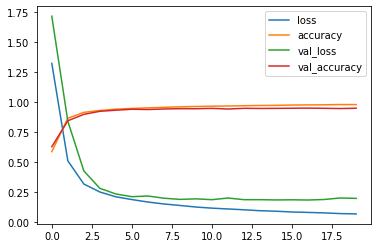

In [39]:
df_metrics_with_nbatch = pd.DataFrame(history_with_nbatch.history)
df_metrics_with_nbatch.plot() 

In [45]:
df_metrics_with_nbatch

,loss,accuracy,val_loss,val_accuracy
0,1.324806,0.586619,1.718697,0.627833
1,0.510195,0.865714,0.841666,0.844500
2,0.315860,0.914905,0.425375,0.898278
3,0.249094,0.930976,0.279917,0.923778
4,0.209046,0.942048,0.232610,0.932944
5,0.185835,0.947833,0.209943,0.941056
6,0.165399,0.952762,0.215640,0.938778
7,0.148932,0.957190,0.197336,0.943333
8,0.136592,0.961143,0.187303,0.945833
9,0.123348,0.964405,0.191859,0.945333


### Step 5: Add dropout to every hidden layer and try again. Does it help?

In [40]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dropout

K.clear_session()


model_r_nbatch_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [41]:
model_r_nbatch_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history_nbatch_drop = model_r_nbatch_drop.fit(xtrain, ytrain, epochs=100, callbacks=[callback], batch_size=600, validation_split = 0.3)

Epoch 1/100


/home/esharifi/anaconda3/envs/deep_learning/lib/python3.6/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


70/70 [==============================] - 2s 14ms/step - loss: 2.7778 - accuracy: 0.1192 - val_loss: 2.2890 - val_accuracy: 0.1039
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 2.3434 - accuracy: 0.1577 - val_loss: 2.2339 - val_accuracy: 0.1346
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 2.1487 - accuracy: 0.2062 - val_loss: 2.0288 - val_accuracy: 0.2573
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 2.0241 - accuracy: 0.2484 - val_loss: 1.7899 - val_accuracy: 0.3814
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 1.9241 - accuracy: 0.2855 - val_loss: 1.5895 - val_accuracy: 0.4327
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 1.8385 - accuracy: 0.3153 - val_loss: 1.4427 - val_accuracy: 0.4886
Epoch 7/100
70/70 [==============================] - 1s 12ms/step - loss: 1.7554 - accuracy: 0.3465 - val_loss: 1.3438 - val_accuracy: 0.4971
Epoch 8/100
70/70 [===

<AxesSubplot:>

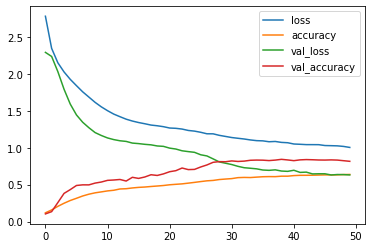

In [43]:
df_metrics_nbatch_drop = pd.DataFrame(history_nbatch_drop.history)
df_metrics_nbatch_drop.plot() 

In [44]:
df_metrics_nbatch_drop

,loss,accuracy,val_loss,val_accuracy
0,2.777775,0.119167,2.288984,0.103889
1,2.343402,0.157667,2.233942,0.134611
2,2.148657,0.206214,2.028801,0.257278
3,2.024120,0.248357,1.789889,0.381389
4,1.924115,0.285452,1.589526,0.432722
5,1.838477,0.315310,1.442684,0.488556
6,1.755392,0.346500,1.343785,0.497056
7,1.684216,0.370714,1.269786,0.496722
8,1.612786,0.389071,1.204046,0.520833
9,1.552129,0.401881,1.164773,0.535333


# Building Neural Networks for make_moons

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np

X, y = make_moons(500, noise=0.1)

m = Sequential([
    Dense(units = 4, activation = 'relu',  input_shape = (2,)),
    Dense(units = 1, activation = 'sigmoid')
])

# build the computation graph
m.compile(optimizer='rmsprop',
          loss='binary_crossentropy',
          metrics=['accuracy'])


In [ ]:
# print all layers
print(m.summary())

In [ ]:
# train the model
h  = m.fit(X, y, epochs=100, batch_size=50, validation_split=0.2)

In [ ]:
import pandas as pd
df_metrics = pd.DataFrame(h.history)
df_metrics 

In [ ]:
# plot the learning curve
plt.plot(h.history['loss'])

In [ ]:
score = m.evaluate(X, y, batch_size=50)
print(score)

In [ ]:
# prediction on new data points
print(m.predict(X[:10]))

In [ ]:
# serialize model
m.save("model.h5")
print("Saved model to disk")

In [ ]:
from tensorflow.keras.models import load_model

# load, create and compile model

network = load_model("model.h5")
network.summary()

In [ ]:
import matplotlib.pyplot as plt

# save a list of np.arrays with the weights
w = network.get_weights()

# see the underlying TensorFlow variables
network.weights

In [ ]:
# extract the names of the TF variables
[v.name for v in network.weights]


In [ ]:
w